<h1> Here, I'll use and AdaBoost algorithm to classify wheter a patient has heart disease or not.  <h1/>

In [1]:
## Use kfold cross validation to fit the model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd 
import numpy as np

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import sklearn.metrics
from scipy import stats

from pprint import pprint

from Ada_Lib import *

In [2]:
## Import dataset
Df_Heart = Import_Data(path = 'C:\\Users\\alexander.leite\\Desktop\\Machine Learning\\datasets\\heart-disease-uci\\heart.csv')

Dataset Lenght:  303
Dataset Shape:  (303, 14)
Dataset:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
## Statistic Summary
Df_Heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
## identify outliers
list_outliers = Identify_outliers(Df_Heart)
list_outliers
## Since we don´t have much outliers, I won't remove them, cause I don't think they will impact in our model performance

[[28, 4],
 [48, 12],
 [85, 4],
 [92, 11],
 [158, 11],
 [163, 11],
 [164, 11],
 [204, 9],
 [220, 4],
 [221, 9],
 [223, 3],
 [246, 4],
 [248, 3],
 [251, 11],
 [272, 7],
 [281, 12]]

Data type :
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object 



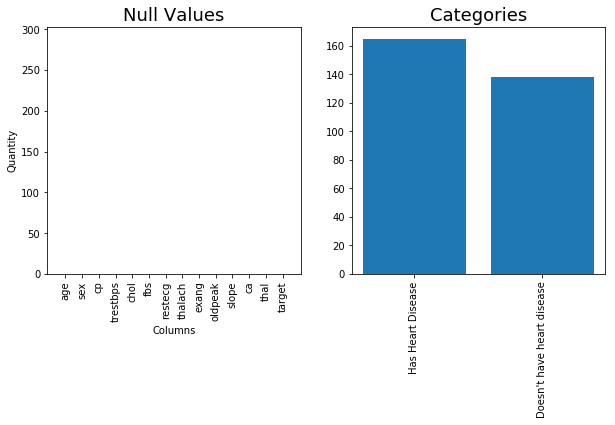

In [5]:
## Show data type along with possible null values and categories distribution

Data_Summaryze(Df_Heart)

<h2> Through 'Corr' function we can identify strong variables for our model </h2>

These 7 variables are correlated with our target:
 cp         0.433798
thalach    0.421741
exang     -0.436757
oldpeak   -0.430696
slope      0.345877
ca        -0.391724
thal      -0.344029
Name: target, dtype: float64


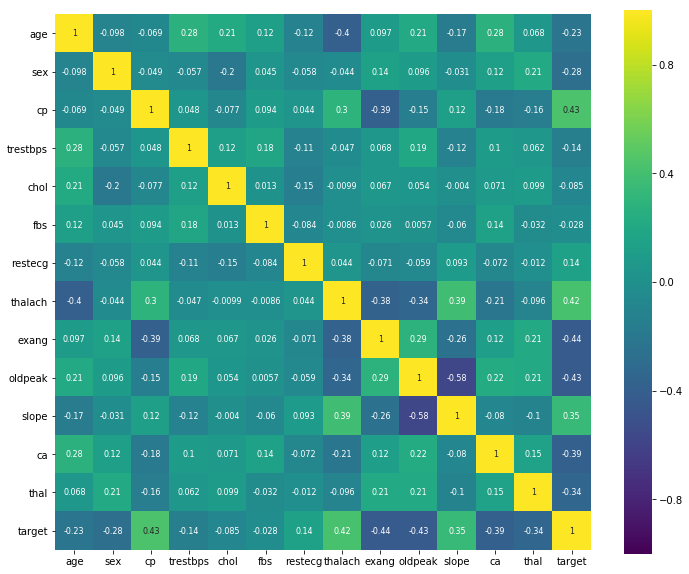

In [6]:
## Correlation matrix
Df_Corr = Correlation_Matrix(Df_Heart)

<h2> Creating and trainning an AdaBoost model using decision trees as a base estimator with all our features <h2>

In [7]:
# Split dataset into train and test
X_train,X_test,y_train,y_test = Split_dataset(Df_Heart,corr=None)
# Create "AdaBoost" model to fit and predict values.
clf_abc = AdaBoost_Fit(X_train,y_train,DecisionTreeClassifier())
y_pred  = AdaBoost_Predict(X_test,clf_abc)
# Calculate Accuracy
Calc_Accuracy(y_test, y_pred)

X train shape :  (212, 13)
y train shape :  (212,)
X test  shape :  (91, 13)
y test  shape :  (91,)
Confusion Matrix:  [[33 12]
 [10 36]]
Accuracy :  75.82417582417582
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.75      0.78      0.77        46

   micro avg       0.76      0.76      0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [8]:
## Use K-Fold to validade our model
KFold_Tree = KFold_Validation(X_test,y_test,False,DecisionTreeClassifier())

In [9]:
Df_Clfs = pd.DataFrame(KFold_Tree)

<h2> Creating and trainning an AdaBoost model using random forest as a base estimator with all our features <h2>

In [10]:
# Split dataset into train and test
X_train,X_test,y_train,y_test = Split_dataset(Df_Heart,corr=None)
# Create "AdaBoost" model to fit and predict values.
clf_abc = AdaBoost_Fit(X_train,y_train,RandomForestClassifier(n_estimators=57))
y_pred  = AdaBoost_Predict(X_test,clf_abc)
# Calculate Accuracy
Calc_Accuracy(y_test, y_pred)

X train shape :  (212, 13)
y train shape :  (212,)
X test  shape :  (91, 13)
y test  shape :  (91,)
Confusion Matrix:  [[37  8]
 [ 4 42]]
Accuracy :  86.81318681318682
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        45
           1       0.84      0.91      0.87        46

   micro avg       0.87      0.87      0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [11]:
## Use K-Fold to validade our model
KFold_Forest = KFold_Validation(X_train,y_train,False,RandomForestClassifier(n_estimators=57))

In [12]:
Df_Clfs = Df_Clfs.append(KFold_Forest,ignore_index=True)

<h2><p>Creating and trainning an AdaBoost model with our 'good correlated' features.</p></h2>
<p>We can see that removing a few of our features, worsened our perfomance. So I'll not discard those features  in the final model. </p>

In [13]:
# Split dataset into train and test
X_train,X_test,y_train,y_test = Split_dataset(Df_Heart,Df_Corr)
# Create "AdaBoost" model to fit and predict values.
clf_abc = AdaBoost_Fit(X_train,y_train,RandomForestClassifier(n_estimators=100))
y_pred  = AdaBoost_Predict(X_test,clf_abc)
# Calculate Accuracy
Calc_Accuracy(y_test, y_pred)

X train shape :  (212, 6)
y train shape :  (212,)
X test  shape :  (91, 6)
y test  shape :  (91,)
Confusion Matrix:  [[22 23]
 [11 35]]
Accuracy :  62.637362637362635
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        45
           1       0.60      0.76      0.67        46

   micro avg       0.63      0.63      0.63        91
   macro avg       0.64      0.62      0.62        91
weighted avg       0.63      0.63      0.62        91



<h1> Now, I'll use "RandomizeSearchCV" to look for better hyperparameters, to analyze if we can increase our model performance <h1>

In [14]:
## Create random grid with our parameters
random_grid = Create_Random_Grid(RandomForestClassifier(n_estimators=50))
random_grid

{'n_estimators': [50,
  57,
  64,
  71,
  78,
  85,
  92,
  100,
  107,
  114,
  121,
  128,
  135,
  142,
  150],
 'learning_rate': [0.5,
  0.6111111111111112,
  0.7222222222222222,
  0.8333333333333333,
  0.9444444444444444,
  1.0555555555555556,
  1.1666666666666665,
  1.2777777777777777,
  1.3888888888888888,
  1.5],
 'algorithm': ['SAMME', 'SAMME.R']}

In [15]:
## Print the best parameters and construct the new "clf" object
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50))
# Split dataset into train and test
X_train,X_test,y_train,y_test = Split_dataset(Df_Heart,corr=None)
# Using RandomizedSearchCV to find our best model
best_grid,clf_best_grid = Random_Grid_Fit(clf,random_grid,X_train,y_train)

X train shape :  (212, 13)
y train shape :  (212,)
X test  shape :  (91, 13)
y test  shape :  (91,)
Fitting 30 folds for each of 100 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.4min finished


In [16]:
best_grid

{'n_estimators': 85, 'learning_rate': 1.5, 'algorithm': 'SAMME.R'}

In [17]:
## Predict values with our "tunned" model
y_pred = Random_Grid_Predict(X_test,clf_best_grid)

In [18]:
# Calculate Accuracy
Calc_Accuracy(y_test, y_pred)
## Here i got and accuracy lower than with the default parameters, but I'll study later and find out why this happened

Confusion Matrix:  [[35 10]
 [ 5 41]]
Accuracy :  83.51648351648352
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        45
           1       0.80      0.89      0.85        46

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [19]:
## Use K-Fold to validade our model
KFold_Forest_Grid = KFold_Validation(X_train,y_train,False,clf_best_grid)

In [20]:
Df_Clfs = Df_Clfs.append(KFold_Forest_Grid,ignore_index=True)
columns = ['test_accuracy','test_precision','test_recall','algorithm']

In [21]:
Df_Clfs.columns = columns

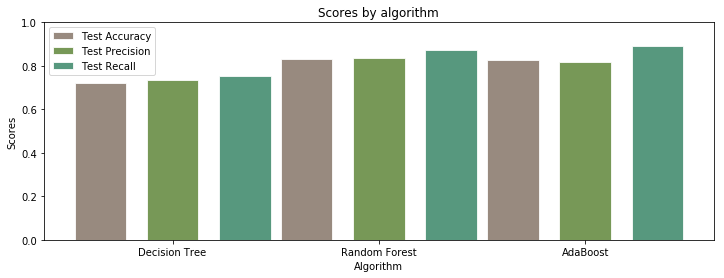

In [22]:
Plot_Scores(Df_Clfs)

<p> We used Adaboost with Decision Trees and Random Forest, comparing those two models perfomance. We can conclude that Random Forests algorithms're performing way better that Decision Trees.<p>
<p> Later, I will include another algorithms in these notebook, so we can compare them against decision trees and random forests. </p>